## Scraping the data

### Importing libraries

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
years = list(range(1991, 2022))

In [4]:
# pages we need data from

url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

In [5]:
# generating url for each year

for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    
    with open("mvp/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [62]:
# downloading mvps

dfs = []
for year in years:
    with open("mvp/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()
        
    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp = pd.read_html(str(mvp_table))[0]
    mvp["Year"] = year
    
    dfs.append(mvp)

In [63]:
dfs

[   Rank             Player  Age   Tm  First  Pts Won  Pts Max  Share   G  \
 0     1     Michael Jordan   27  CHI   77.0    891.0      960  0.928  82   
 1     2      Magic Johnson   31  LAL   10.0    497.0      960  0.518  79   
 2     3     David Robinson   25  SAS    6.0    476.0      960  0.496  82   
 3     4    Charles Barkley   27  PHI    2.0    222.0      960  0.231  67   
 4     5        Karl Malone   27  UTA    0.0    142.0      960  0.148  82   
 5     6      Clyde Drexler   28  POR    1.0     75.0      960  0.078  82   
 6     7      Kevin Johnson   24  PHO    0.0     32.0      960  0.033  77   
 7     8  Dominique Wilkins   31  ATL    0.0     29.0      960  0.030  81   
 8    9T         Larry Bird   34  BOS    0.0     25.0      960  0.026  60   
 9    9T       Terry Porter   27  POR    0.0     25.0      960  0.026  81   
 10   11      Patrick Ewing   28  NYK    0.0     20.0      960  0.021  81   
 11   12      John Stockton   28  UTA    0.0     15.0      960  0.016  82   

In [64]:
# combining votes with pandas

mvps = pd.concat(dfs)

In [71]:
mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021
14,13T,Kawhi Leonard,29,LAC,0.0,1.0,1010,0.001,52,34.1,...,6.5,5.2,1.6,0.4,0.512,0.398,0.885,8.8,0.238,2021


In [68]:
# saving to csv

mvps.to_csv("mvps.csv")

In [69]:
# downloading player stats
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

url = player_stats_url.format(1991)
data = requests.get(url)

with open("player/1991.html", "w+", encoding="utf-8") as f:
    f.write(data.text)

In [72]:
# using selenium to scrape a javasript page

from selenium import webdriver

In [81]:
driver = webdriver.Chrome(executable_path=r"C:/Users/agyei/Downloads/chromedriver.exe")

C:\Users\agyei\AppData\Local\Temp\ipykernel_19916\3417129209.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=r"C:/Users/agyei/Downloads/chromedriver.exe")


In [86]:
# running script to capture and download pages
for year in years:
    url = player_stats_url.format(year)

    driver.get(url)
    driver.execute_script("window.scrollTo(1, 1000)")
    time.sleep(2)

    html = driver.page_source
    with open("player/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(html)

In [90]:
df = []

for year in years:
    with open("player/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find(id="per_game_stats")
    player = pd.read_html(str(player_table))[0]
    player["Year"] = year
    df.append(player)

In [1]:
players = pd.concat(df)

NameError: name 'pd' is not defined

In [93]:
players

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,8.3,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,9.7,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,17.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,6.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [94]:
# saving to csv

players.to_csv("players.csv")

In [95]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [97]:
# downloading team data

for year in years:
    url = team_stats_url.format(year)

    data = requests.get(url)

    with open("team/{}.html".format(year), "w+", encoding="utf-8") as f:
        f.write(data.text)

In [102]:
dfs = []
# parsing team data with BeautifulSoup
for year in years:
    with open("team/{}.html".format(year), encoding="utf-8") as f:
        page = f.read()

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    team_table = soup.find(id="divs_standings_E")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Eastern Conference"]
    del team["Eastern Conference"]
    dfs.append(team)

    soup = BeautifulSoup(page, "html.parser")
    soup.find('tr', class_="thead").decompose()
    team_table = soup.find(id="divs_standings_W")
    team = pd.read_html(str(team_table))[0]
    team["Year"] = year
    team["Team"] = team["Western Conference"]
    del team["Western Conference"]
    dfs.append(team)

In [103]:
# combining team stats with pandas

teams = pd.concat(dfs)

In [104]:
teams

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...
13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [105]:
# saving to csv

teams.to_csv("teams.csv")

### Cleaning mvps data

In [29]:
mvps = pd.read_csv("mvps.csv")

In [33]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
470,11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
471,12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
472,13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


In [34]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]

In [35]:
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1991,891.0,960,0.928
1,Magic Johnson,1991,497.0,960,0.518
2,David Robinson,1991,476.0,960,0.496
3,Charles Barkley,1991,222.0,960,0.231
4,Karl Malone,1991,142.0,960,0.148


### Cleaning player data

In [7]:
players = pd.read_csv("players.csv")

In [8]:
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18039,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
18040,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
18041,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
18042,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [14]:
# deleting unwanted columns

del players["Unnamed: 0"]
del players["Rk"]

KeyError: 'Unnamed: 0'

In [13]:
players["Player"].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In [15]:
players["Player"] = players["Player"].str.replace("*", "", regex=False)

In [16]:
players.head(50)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,.474,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,.413,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,.509,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,.394,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,.462,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991
5,Danny Ainge,SG,31,POR,80,0,21.4,4.2,8.9,.472,...,0.6,2.0,2.6,3.6,0.8,0.2,1.3,2.4,11.1,1991
6,Mark Alarie,PF,27,WSB,42,1,14.0,2.4,5.4,.440,...,1.0,1.8,2.8,1.1,0.4,0.2,1.0,2.1,5.8,1991
7,Steve Alford,PG,26,DAL,34,0,6.9,1.7,3.4,.504,...,0.3,0.4,0.7,0.6,0.2,0.0,0.5,0.3,4.4,1991
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991


In [22]:
# grouping multiple entries with pandas function

players.groupby(["Player", "Year"])

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,TOT,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
9,Greg Anderson,PF,26,MIL,26,0,9.5,1.0,2.8,.370,...,1.0,1.9,2.9,0.1,0.3,0.3,0.8,1.1,2.7,1991
10,Greg Anderson,PF,26,NJN,1,0,18.0,4.0,4.0,1.000,...,4.0,2.0,6.0,1.0,2.0,0.0,1.0,4.0,8.0,1991
11,Greg Anderson,PF,26,DEN,41,2,16.1,2.1,4.7,.440,...,1.6,4.1,5.8,0.3,0.6,0.9,1.5,2.6,5.2,1991


In [23]:
# defining function to eliminate multiple rows

def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1, :]["Tm"]
        return row
    
# running function
players = players.groupby(["Player", "Year"]).apply(single_row)

In [24]:
players.head(20)

Player Pos Age   Tm   G  GS    MP   FG   FGA  \
Player        Year                                                              
A.C. Green    1991 164       A.C. Green  PF  27  LAL  82  21  26.4  3.1   6.6   
              1992 633       A.C. Green  PF  28  LAL  82  53  35.4  4.7   9.8   
              1993 1092      A.C. Green  PF  29  LAL  82  55  34.4  4.6   8.6   
              1994 1579      A.C. Green  PF  30  PHO  82  55  34.5  5.7  11.3   
              1995 2067      A.C. Green  SF  31  PHO  82  52  32.8  3.8   7.5   
              1996 2563      A.C. Green  SF  32  PHO  82  36  25.8  2.6   5.4   
              1997 3138      A.C. Green  PF  33  DAL  83  73  30.0  2.8   5.8   
              1998 3725      A.C. Green  PF  34  DAL  82  68  32.3  3.0   6.5   
              1999 4283      A.C. Green  PF  35  DAL  50  35  18.5  2.2   5.1   
              2000 4811      A.C. Green  PF  36  LAL  82  82  23.5  2.1   4.7   
              2001 5330      A.C. Green  PF  37  MIA  82   1  17.2  1.8   4.0   
A.J. Bramlett 2000 4684   A.J. Bramlett   C  23  CLE   8   0   7.6  0.5   2.6   
A.J. English  1991 127     A.J. English  SG  23  WSB  70  12  20.6  3.6   8.2   
              1992 597     A.J. English  SG  24  WSB  81   6  20.6  4.5  10.4   
A.J. Guyton   2001 5333     A.J. Guyton  PG  22  CHI  33   8  19.1  2.4   5.8   
              2002 5886     A.J. Guyton  PG  23  CHI  45   6  13.5  2.0   5.4   
              2003 6393     A.J. Guyton  PG  24  GSW   2   0   4.5  0.0   2.0   
A.J. Hammons  2017 14814   A.J. Hammons   C  24  DAL  22   0   7.4  0.8   1.9   
A.J. Price    2010 10727     A.J. Price  PG  23  IND  56   2  15.4  2.6   6.3   
              2011 11356     A.J. Price  PG  24  IND  50   0  15.9  2.3   6.4   

                           FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV   PF  \
Player        Year              ...                                           
A.C. Green    1991 164    .476  ...  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   
              1992 633    .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7   
              1993 1092   .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8   
              1994 1579   .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7   
              1995 2067   .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8   
              1996 2563   .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0  1.7   
              1997 3138   .483  ...  2.7  5.2  7.9  0.8  0.8  0.2  0.9  1.7   
              1998 3725   .453  ...  2.7  5.5  8.1  1.5  1.0  0.3  0.8  1.9   
              1999 4283   .422  ...  1.6  2.9  4.6  0.5  0.6  0.2  0.4  1.4   
              2000 4811   .447  ...  2.0  4.0  5.9  1.0  0.6  0.2  0.6  1.5   
              2001 5330   .444  ...  1.3  2.5  3.8  0.5  0.4  0.1  0.5  1.5   
A.J. Bramlett 2000 4684   .190  ...  1.5  1.3  2.8  0.0  0.1  0.0  0.4  1.6   
A.J. English  1991 127    .439  ...  0.9  1.2  2.1  2.5  0.4  0.2  1.6  1.8   
              1992 597    .433  ...  0.9  1.2  2.1  1.8  0.4  0.1  1.1  2.0   
A.J. Guyton   2001 5333   .406  ...  0.3  0.8  1.1  1.9  0.3  0.2  0.7  1.1   
              2002 5886   .361  ...  0.3  0.7  1.0  1.8  0.2  0.2  0.8  0.5   
              2003 6393   .000  ...  0.0  0.0  0.0  1.0  0.5  0.0  0.5  0.0   
A.J. Hammons  2017 14814  .405  ...  0.4  1.3  1.6  0.2  0.0  0.6  0.5  1.0   
A.J. Price    2010 10727  .410  ...  0.2  1.4  1.6  1.9  0.6  0.1  1.1  0.9   
              2011 11356  .356  ...  0.3  1.1  1.4  2.2  0.6  0.0  1.1  1.2   

                           PTS  Year  
Player        Year                    
A.C. Green    1991 164     9.1  1991  
              1992 633    13.6  1992  
              1993 1092   12.8  1993  
              1994 1579   14.7  1994  
              1995 2067   11.2  1995  
              1996 2563    7.5  1996  
              1997 3138    7.2  1997  
              1998 3725    7.3  1998  
              1999 4283    4.9  1999  
              2000 4811    5.0  2000  
              2001 5330    4.5  2001  
A.J.

In [25]:
players.index = players.index.droplevel()

In [26]:
players.index = players.index.droplevel()

In [27]:
players.head(20)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
633,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
1092,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1579,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
2067,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2563,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
3138,A.C. Green,PF,33,DAL,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
3725,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998
4283,A.C. Green,PF,35,DAL,50,35,18.5,2.2,5.1,.422,...,1.6,2.9,4.6,0.5,0.6,0.2,0.4,1.4,4.9,1999
4811,A.C. Green,PF,36,LAL,82,82,23.5,2.1,4.7,.447,...,2.0,4.0,5.9,1.0,0.6,0.2,0.6,1.5,5.0,2000


In [28]:
players[players["Player"] == "Greg Anderson"]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
8,Greg Anderson,PF,26,DEN,68,2,13.6,1.7,4.0,.430,...,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3,1991
467,Greg Anderson,PF,27,DEN,82,82,34.1,4.7,10.4,.456,...,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5,1992
1412,Greg Anderson,PF,29,DET,77,47,21.1,2.6,4.8,.543,...,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4,1994
1911,Greg Anderson,PF,30,ATL,51,0,12.2,1.1,2.0,.548,...,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9,1995
2381,Greg Anderson,PF,31,SAS,46,7,7.5,0.5,1.0,.511,...,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2,1996
2948,Greg Anderson,C,32,SAS,82,48,20.2,1.6,3.2,.496,...,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9,1997
3541,Greg Anderson,C,33,ATL,50,0,8.0,0.7,1.6,.444,...,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8,1998


## 

### Combining player and mvp data

In [47]:
combined = players.merge(mvps, how = "outer", on=["Player", "Year"])

In [48]:
combined.head(5)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.9,0.7,0.3,1.2,1.4,9.1,1991,NaN,NaN,NaN
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN


In [49]:
# filling null values with zeroes
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [50]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
187,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
329,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
331,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
332,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
333,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13587,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13588,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13592,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13952,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


## 

### Cleaning Team data

In [62]:
teams = pd.read_csv("teams.csv")

In [63]:
teams

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
...,...,...,...,...,...,...,...,...,...,...
1028,13,42,30,.583,—,112.4,110.2,2.26,2021,Dallas Mavericks*
1029,14,38,34,.528,4.0,113.3,112.3,1.07,2021,Memphis Grizzlies*
1030,15,33,39,.458,9.0,111.1,112.8,-1.58,2021,San Antonio Spurs
1031,16,31,41,.431,11.0,114.6,114.9,-0.20,2021,New Orleans Pelicans


In [64]:
teams.head(30)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [65]:
# deleting rows with division string

teams = teams[~teams["W"].str.contains("Division")]

In [66]:
# removing asterisks from team names
teams["Team"] = teams["Team"].str.replace("*", "", regex = False)

C:\Users\agyei\AppData\Local\Temp\ipykernel_14676\2489066169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teams["Team"] = teams["Team"].str.replace("*", "", regex = False)


In [67]:
teams.head(5)

,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics
1,1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers
2,2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks
3,3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [68]:
teams["Team"].unique()

array(['Boston Celtics', 'Philadelphia 76ers', 'New York Knicks',
       'Washington Bullets', 'New Jersey Nets', 'Miami Heat',
       'Chicago Bulls', 'Detroit Pistons', 'Milwaukee Bucks',
       'Atlanta Hawks', 'Indiana Pacers', 'Cleveland Cavaliers',
       'Charlotte Hornets', 'San Antonio Spurs', 'Utah Jazz',
       'Houston Rockets', 'Orlando Magic', 'Minnesota Timberwolves',
       'Dallas Mavericks', 'Denver Nuggets', 'Portland Trail Blazers',
       'Los Angeles Lakers', 'Phoenix Suns', 'Golden State Warriors',
       'Seattle SuperSonics', 'Los Angeles Clippers', 'Sacramento Kings',
       'Toronto Raptors', 'Vancouver Grizzlies', 'Washington Wizards',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

In [69]:
combined["Tm"].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'POR', 'DET', 'PHI', 'UTA', 'MIL', 'VAN', 'SEA', 'NJN',
       'NOK', 'LAC', 'OKC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [72]:
# create dictionary to map abbreviations to team names

nicknames = {}

with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev, name = line.replace("\n", "").split(",")
        nicknames[abbrev] = name

In [73]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

In [75]:
# 

combined["Team"] = combined["Tm"].map(nicknames)

In [76]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14089,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


## 

### Combining teams and "combined" data

In [77]:
stats = combined.merge(teams, how = "outer", on = ["Team", "Year"])

In [78]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Share,Team,Unnamed: 0,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,.477,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,.455,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,.340,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,.492,...,0.0,Los Angeles Lakers,10,58,24,.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45
14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,Milwaukee Bucks,7,42,40,.512,9.0,103.6,103.8,-0.45


In [79]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,0.7,0.3,1.2,1.4,9.1,1991,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
3,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
14088,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
14089,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
14090,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [80]:
# deleting unwanted column

del stats["Unnamed: 0"]

In [81]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

## 

### Converting object type columns to numeric type

In [82]:
stats = stats.apply(pd.to_numeric, errors="ignore")

In [83]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [84]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [87]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [88]:
stats["GB"].unique()

array(['5.0', '14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [89]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [90]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [91]:
# saving combined data to csv

stats.to_csv("player_mvp_stats.csv")

In [2]:
# reading csv files

stats = pd.read_csv("player_mvp_stats.csv")

In [3]:
del stats["Unnamed: 0"]

### Exploring Data

In [4]:
# highest scoring player

highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending=False).head(10)

In [5]:
highest_scoring

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
9634,James Harden,PG,29,HOU,78,78,36.8,10.8,24.5,0.442,...,1010.0,0.768,Houston Rockets,53,29,0.646,0.0,113.9,109.1,4.96
1051,Kobe Bryant,SG,27,LAL,80,80,41.0,12.2,27.2,0.450,...,1250.0,0.386,Los Angeles Lakers,45,37,0.549,9.0,99.4,96.9,2.53
4425,Allen Iverson,PG,30,PHI,72,72,43.1,11.3,25.3,0.447,...,1250.0,0.001,Philadelphia 76ers,38,44,0.463,11.0,99.4,101.3,-2.10
9953,Michael Jordan,SG,29,CHI,78,78,39.3,12.7,25.7,0.495,...,980.0,0.577,Chicago Bulls,57,25,0.695,0.0,105.2,98.9,6.19
6871,Tracy McGrady,SG,23,ORL,75,74,39.4,11.1,24.2,0.457,...,1190.0,0.359,Orlando Magic,42,40,0.512,7.0,98.5,98.4,-0.39
6300,Kevin Durant,SF,25,OKC,81,81,38.5,10.5,20.8,0.503,...,1250.0,0.986,Oklahoma City Thunder,59,23,0.720,0.0,106.2,99.8,6.66
6352,Russell Westbrook,PG,28,OKC,81,81,34.6,10.2,24.0,0.425,...,1010.0,0.879,Oklahoma City Thunder,47,35,0.573,4.0,106.6,105.8,1.14
1065,Kobe Bryant,SG,28,LAL,77,77,40.8,10.6,22.8,0.463,...,1290.0,0.404,Los Angeles Lakers,42,40,0.512,19.0,103.3,103.4,0.24
9927,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,0.539,...,960.0,0.928,Chicago Bulls,61,21,0.744,0.0,110.0,101.0,8.57
3263,LeBron James,SF,21,CLE,79,79,42.5,11.1,23.1,0.480,...,1250.0,0.550,Cleveland Cavaliers,50,32,0.610,14.0,97.6,95.4,2.17


<AxesSubplot:xlabel='Player'>

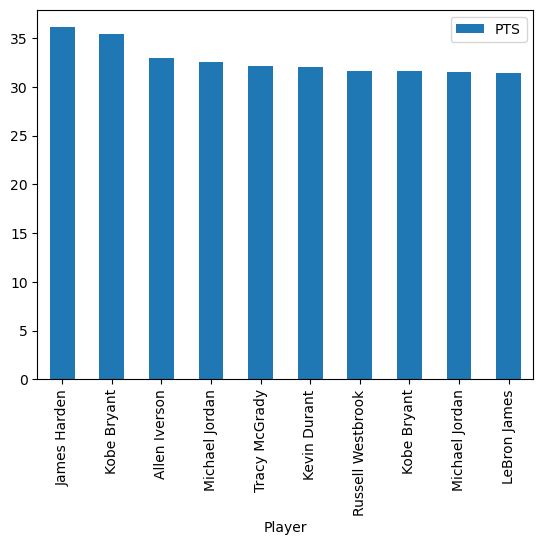

In [6]:
# creating bar plot of highest scoring data

highest_scoring.plot.bar("Player", "PTS")

In [7]:
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending=False).head(1))

<AxesSubplot:xlabel='Year'>

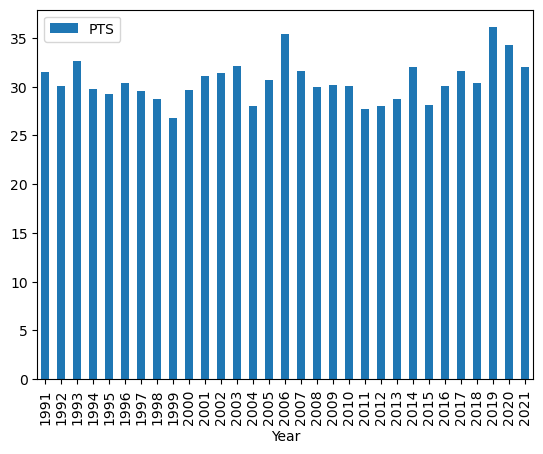

In [8]:
highest_scoring.plot.bar("Year", "PTS")

In [9]:
# correlations with share columns

stats.corr()["Share"]

Age        0.018596
G          0.089282
GS         0.167476
MP         0.162175
FG         0.276365
FGA        0.249254
FG%        0.065789
3P         0.096225
3PA        0.096460
3P%        0.013611
2P         0.275976
2PA        0.251885
2P%        0.063240
eFG%       0.059335
FT         0.316392
FTA        0.321457
FT%        0.037875
ORB        0.101375
DRB        0.213241
TRB        0.186209
AST        0.200253
STL        0.175041
BLK        0.154713
TOV        0.233015
PF         0.071045
PTS        0.288267
Year      -0.008135
Pts Won    0.995153
Pts Max    0.521335
Share      1.000000
W          0.122718
L         -0.121866
W/L%       0.126559
GB        -0.101014
PS/G       0.045206
PA/G      -0.039617
SRS        0.122782
Name: Share, dtype: float64

<AxesSubplot:>

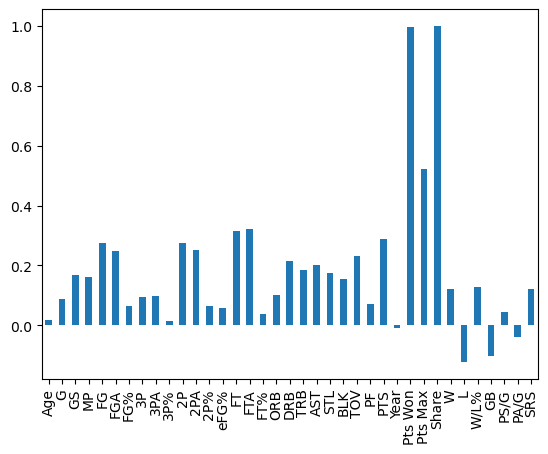

In [10]:
# correlations with share columns

stats.corr()["Share"].plot.bar()

In [13]:
# checking null values in data

pd.isnull(stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64